# Tank Mix Trial

#### Authors: Tim Waters & David Linnard Wheeler

## Import & inspect data

- Import packages

In [13]:
library(agricolae)
library(Hmisc)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(patchwork)
library(DescTools)
library(knitr)
library(car)

In [14]:
getwd()

[1] "C:/Users/gcson/OneDrive - Washington State University (email.wsu.edu)/Desktop/TankMixTrials/2021/Scripts"

In [15]:
df=read.table("C:/Users/gcson/OneDrive - Washington State University (email.wsu.edu)/Desktop/TankMixTrials/2021/Data/TankMixData_21.csv",
                header=T, sep=",")

In [16]:
df = df[1:11]

- Inspect data

In [17]:
str(df)

'data.frame':	64 obs. of  11 variables:
 $ Treatment          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Description        : Factor w/ 15 levels "Beleaf;Luna Tranquility;NIS",..: 5 8 9 11 1 3 10 3 4 6 ...
 $ Block              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Code               : int  104 111 105 110 116 112 108 113 109 101 ...
 $ Senescence_06.15.21: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Senescence_06.24.21: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Senescence_07.09.21: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Senescence_07.20.21: int  1 10 0 1 15 0 2 1 1 5 ...
 $ Senescence_07.27.21: int  5 20 2 5 10 10 5 10 10 10 ...
 $ Senescence_08.10.21: int  25 50 30 25 25 45 40 45 40 35 ...
 $ Senescence_08.20.21: int  60 70 50 30 40 40 30 45 30 50 ...


- Coerce `Treatment` and `Block` from `int` to `factors`

In [18]:
df[c("Treatment", "Block")] <- lapply(df[c("Treatment", "Block")],
                                                factor)

- sanity check

In [19]:
str(df)

'data.frame':	64 obs. of  11 variables:
 $ Treatment          : Factor w/ 16 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Description        : Factor w/ 15 levels "Beleaf;Luna Tranquility;NIS",..: 5 8 9 11 1 3 10 3 4 6 ...
 $ Block              : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ Code               : int  104 111 105 110 116 112 108 113 109 101 ...
 $ Senescence_06.15.21: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Senescence_06.24.21: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Senescence_07.09.21: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Senescence_07.20.21: int  1 10 0 1 15 0 2 1 1 5 ...
 $ Senescence_07.27.21: int  5 20 2 5 10 10 5 10 10 10 ...
 $ Senescence_08.10.21: int  25 50 30 25 25 45 40 45 40 35 ...
 $ Senescence_08.20.21: int  60 70 50 30 40 40 30 45 30 50 ...


- What are the unique values of each column

In [20]:
lapply(df, unique) 

$Treatment
 [1] 1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16
Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16

$Description
 [1] Control                        Fulfill;Manzate;NIS           
 [3] Fulfill;NIS                    Manzate;NIS                   
 [5] Beleaf;Luna Tranquility;NIS    Beleaf;NIS                    
 [7] Luna Tranquility;NIS           Bravo WS;NIS                  
 [9] Fulfill;Bravo WS;NIS           Beleaf;Manzate;NIS            
[11] Fulfill;Luna Tranquility;NIS   Transform;NIS                 
[13] Transform;Bravo WS;NIS         Transform;Luna Tranquility;NIS
[15] Transform;Manzate;NIS         
15 Levels: Beleaf;Luna Tranquility;NIS Beleaf;Manzate;NIS ... Transform;NIS

$Block
[1] 1 2 3 4
Levels: 1 2 3 4

$Code
 [1] 104 111 105 110 116 112 108 113 109 101 103 114 106 115 107 102 209 208 214
[20] 203 202 210 212 204 201 205 213 206 207 211 215 216 301 310 308 305 309 306
[39] 302 314 315 304 312 307 303 316 311 313 413 401 404 403 414 411 409 405 406
[58] 410 407 416 402 415 412 408

$Senescence_06.15.21
[1] 0

$Senescence_06.24.21
[1] 0

$Senescence_07.09.21
[1] 0

$Senescence_07.20.21
[1]  1 10  0 15  2  5  3 20

$Senescence_07.27.21
[1]  5 20  2 10 15 25  3

$Senescence_08.10.21
[1] 25 50 30 45 40 35 20 15 55

$Senescence_08.20.21
 [1] 60 70 50 30 40 45 20 35 55 25 15

## Curate data

AUSPC

- Inspect names

In [21]:
names(df)

[1] "Treatment"           "Description"         "Block"              
 [4] "Code"                "Senescence_06.15.21" "Senescence_06.24.21"
 [7] "Senescence_07.09.21" "Senescence_07.20.21" "Senescence_07.27.21"
[10] "Senescence_08.10.21" "Senescence_08.20.21"

- Extract days of the month when data were collected

In [22]:
ts <- gsub("(?:[^.]+\\.){1}([^.]+).*", "\\1",
    names(df)[(grepl("Sen", names(df)))])
ts

[1] "15" "24" "09" "20" "27" "10" "20"

- Convert to numbers

In [23]:
ts <- as.numeric(ts)
ts

[1] 15 24  9 20 27 10 20

- Convert days in August to 'extra' days in July

In [24]:
ts[3:5]=ts[3:5]+30
ts[6:7]=ts[6:7]+61
ts= ts-14
ts

[1]  1 10 25 36 43 57 67

- Rename columns

In [25]:
names(df)[(grepl("Sen", names(df)))] <- ts

- Sanity check

In [26]:
head(df)

Treatment,Description,Block,Code,1,10,25,36,43,57,67
1,Control,1,104,0,0,0,1,5,25,60
2,Fulfill;Manzate;NIS,1,111,0,0,0,10,20,50,70
3,Fulfill;NIS,1,105,0,0,0,0,2,30,50
4,Manzate;NIS,1,110,0,0,0,1,5,25,30
5,Beleaf;Luna Tranquility;NIS,1,116,0,0,0,15,10,25,40
6,Beleaf;NIS,1,112,0,0,0,0,10,45,40


In [27]:
colnames(df)

[1] "Treatment"   "Description" "Block"       "Code"        "1"          
 [6] "10"          "25"          "36"          "43"          "57"         
[11] "67"

In [28]:
df$AUDPC <- audpc(df[,5:11],ts)

## Summary statistics

### summaries

In [29]:
summary(df)

   Treatment                       Description Block       Code      
 1      : 4   Beleaf;NIS                 : 8   1:16   Min.   :101.0  
 2      : 4   Beleaf;Luna Tranquility;NIS: 4   2:16   1st Qu.:179.8  
 3      : 4   Beleaf;Manzate;NIS         : 4   3:16   Median :258.5  
 4      : 4   Bravo WS;NIS               : 4   4:16   Mean   :258.5  
 5      : 4   Control                    : 4          3rd Qu.:337.2  
 6      : 4   Fulfill;Bravo WS;NIS       : 4          Max.   :416.0  
 (Other):40   (Other)                    :36                         
       1           10          25          36               43        
 Min.   :0   Min.   :0   Min.   :0   Min.   : 0.000   Min.   : 2.000  
 1st Qu.:0   1st Qu.:0   1st Qu.:0   1st Qu.: 1.000   1st Qu.: 5.000  
 Median :0   Median :0   Median :0   Median : 5.000   Median :10.000  
 Mean   :0   Mean   :0   Mean   :0   Mean   : 5.469   Mean   : 9.938  
 3rd Qu.:0   3rd Qu.:0   3rd Qu.:0   3rd Qu.:10.000   3rd Qu.:10.000  
 Max.   :0   M

In [30]:
describe(df)

df 

 12  Variables      64  Observations
--------------------------------------------------------------------------------
Treatment 
       n  missing distinct 
      64        0       16 

lowest : 1  2  3  4  5 , highest: 12 13 14 15 16
                                                                            
Value          1     2     3     4     5     6     7     8     9    10    11
Frequency      4     4     4     4     4     4     4     4     4     4     4
Proportion 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062
                                        
Value         12    13    14    15    16
Frequency      4     4     4     4     4
Proportion 0.062 0.062 0.062 0.062 0.062
--------------------------------------------------------------------------------
Description 
       n  missing distinct 
      64        0       15 

lowest : Beleaf;Luna Tranquility;NIS    Beleaf;Manzate;NIS             Beleaf;NIS                     Bravo WS;NIS                   Cont

### summary statistics by treatment

In [31]:
str(df)

'data.frame':	64 obs. of  12 variables:
 $ Treatment  : Factor w/ 16 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Description: Factor w/ 15 levels "Beleaf;Luna Tranquility;NIS",..: 5 8 9 11 1 3 10 3 4 6 ...
 $ Block      : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ Code       : int  104 111 105 110 116 112 108 113 109 101 ...
 $ 1          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 10         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 25         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 36         : int  1 10 0 1 15 0 2 1 1 5 ...
 $ 43         : int  5 20 2 5 10 10 5 10 10 10 ...
 $ 57         : int  25 50 30 25 25 45 40 45 40 35 ...
 $ 67         : int  60 70 50 30 40 40 30 45 30 50 ...
 $ AUDPC      : num  662 1250 631 512 740 ...


- AUDPC by treatment

In [32]:
df %>%
group_by(Treatment) %>%
summarise('mu' = mean(AUDPC,na.rm=T),
         'sd' = sd(AUDPC,na.rm=T))

Treatment,mu,sd
1,885.125,206.52335
2,985.875,216.57038
3,887.125,198.47686
4,748.250,295.41905
5,690.625,103.12563
6,989.375,147.11638
7,708.875,200.05473
8,767.500,232.48441
9,862.875,295.01649
10,867.500,111.89653


## Exploratory data analysis

boxplots

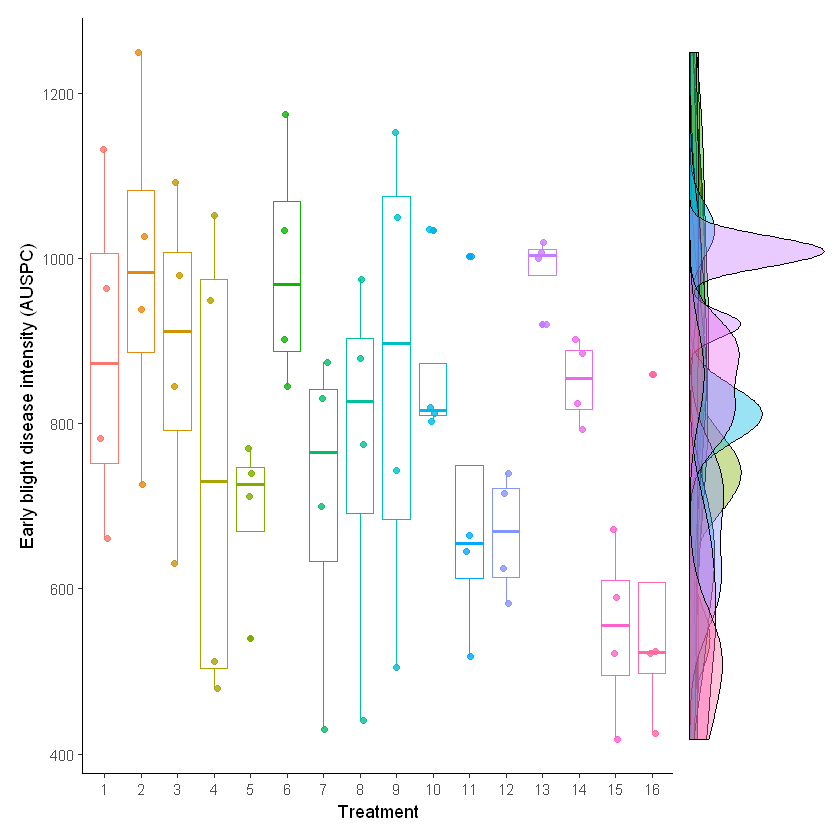

In [33]:
# Boxplots
p <- ggplot(df) +
geom_boxplot(aes(x=Treatment, y=AUDPC, color=Treatment)) +
geom_jitter(aes(x=Treatment, y=AUDPC, color=Treatment),
            alpha=0.8,
            position=position_jitter(width=0.1)) + 
labs(y="Early blight disease intensity (AUSPC)") +
theme_classic() + theme(legend.position = "none")

# Marginal histogram
mh <- ggplot(df, aes(x=AUDPC, fill=Treatment)) + 
  geom_density(alpha = 0.4) + 
  theme_void() + 
  theme(legend.position = "none") + 
  coord_flip()

# Plot all
p + mh + plot_layout(ncol = 2, nrow = 1,
                    widths = c(4, 1), heights = c(1,1))

log-transformed

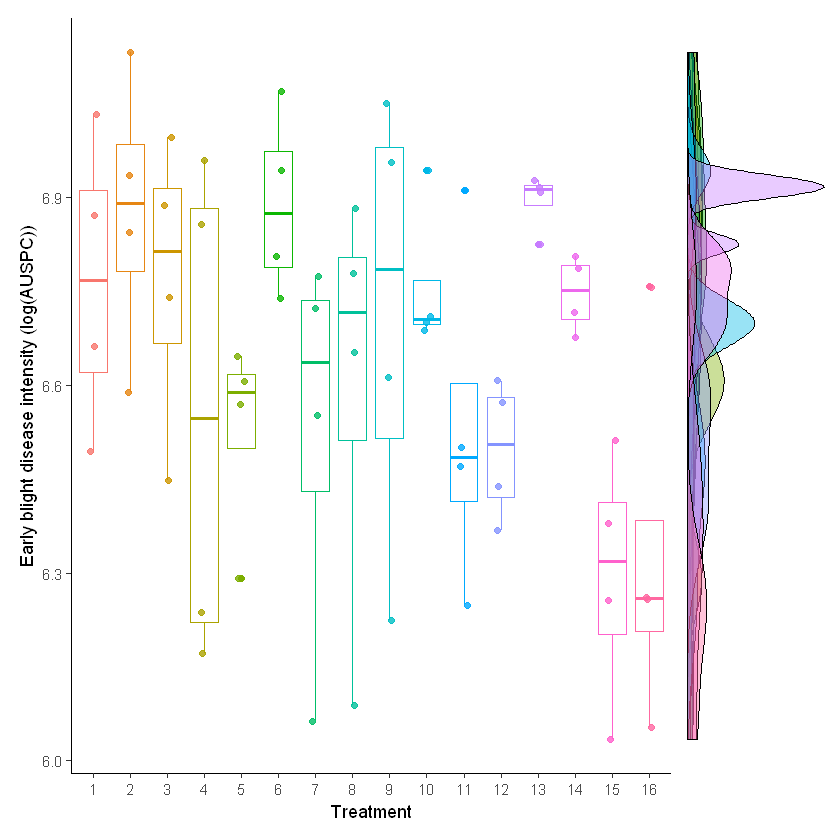

In [34]:
# Boxplots
p <- ggplot(df) +
geom_boxplot(aes(x=Treatment, y=log(AUDPC), color=Treatment)) +
geom_jitter(aes(x=Treatment, y=log(AUDPC), color=Treatment),
            alpha=0.8,
            position=position_jitter(width=0.1)) +   
labs(y="Early blight disease intensity (log(AUSPC))") +
theme_classic() + theme(legend.position = "none")

# Marginal histogram
mh <- ggplot(df, aes(x=log(AUDPC), fill=Treatment)) + 
  geom_density(alpha = 0.4) + 
  theme_void() + 
  theme(legend.position = "none") + 
  coord_flip()

# Plot all
p + mh + plot_layout(ncol = 2, nrow = 1,
                    widths = c(4, 1), heights = c(1,1))

## Inference

1. Fit ANOVA model

In [35]:
m <- lm(AUDPC ~ Treatment + Block,
       data=df)
m2 <- aov(AUDPC ~ Treatment + Block,
       data=df)

- summary

In [36]:
anova(m)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Treatment,15,1164880.4,77658.69,2.676627,0.00548329
Block,3,324036.8,108012.26,3.722810,0.01786591
Residuals,45,1305613.6,29013.64,NA,NA


In [37]:
summary(m)


Call:
lm(formula = AUDPC ~ Treatment + Block, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-339.14  -76.32  -19.16   71.64  332.58 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   816.67      92.81   8.800 2.44e-11 ***
Treatment2    100.75     120.44   0.836  0.40730    
Treatment3      2.00     120.44   0.017  0.98682    
Treatment4   -136.88     120.44  -1.136  0.26180    
Treatment5   -194.50     120.44  -1.615  0.11333    
Treatment6    104.25     120.44   0.866  0.39133    
Treatment7   -176.25     120.44  -1.463  0.15033    
Treatment8   -117.62     120.44  -0.977  0.33399    
Treatment9    -22.25     120.44  -0.185  0.85427    
Treatment10   -17.62     120.44  -0.146  0.88431    
Treatment11  -177.38     120.44  -1.473  0.14780    
Treatment12  -219.38     120.44  -1.821  0.07520 .  
Treatment13   102.00     120.44   0.847  0.40155    
Treatment14   -33.75     120.44  -0.280  0.78060    
Treatment15  -334.75     120.44  -2.77

## Diagnostics

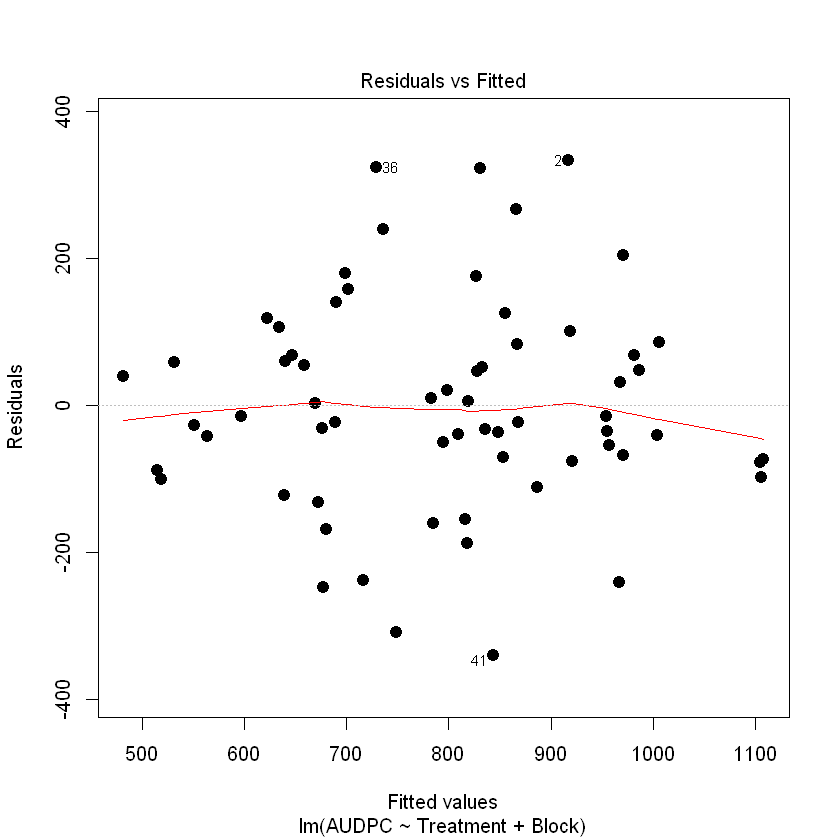

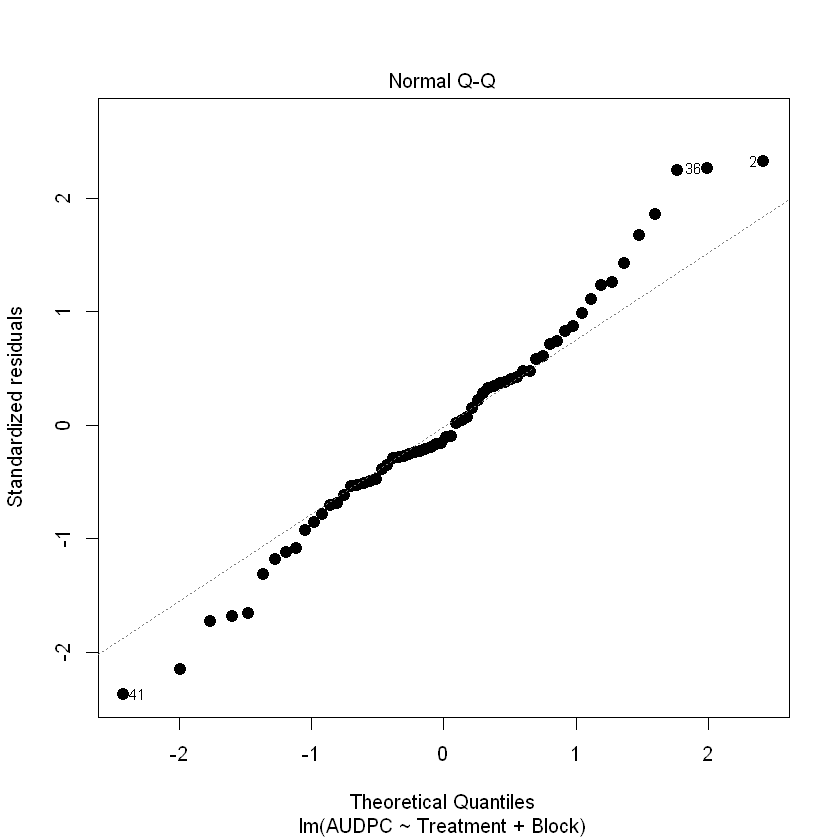

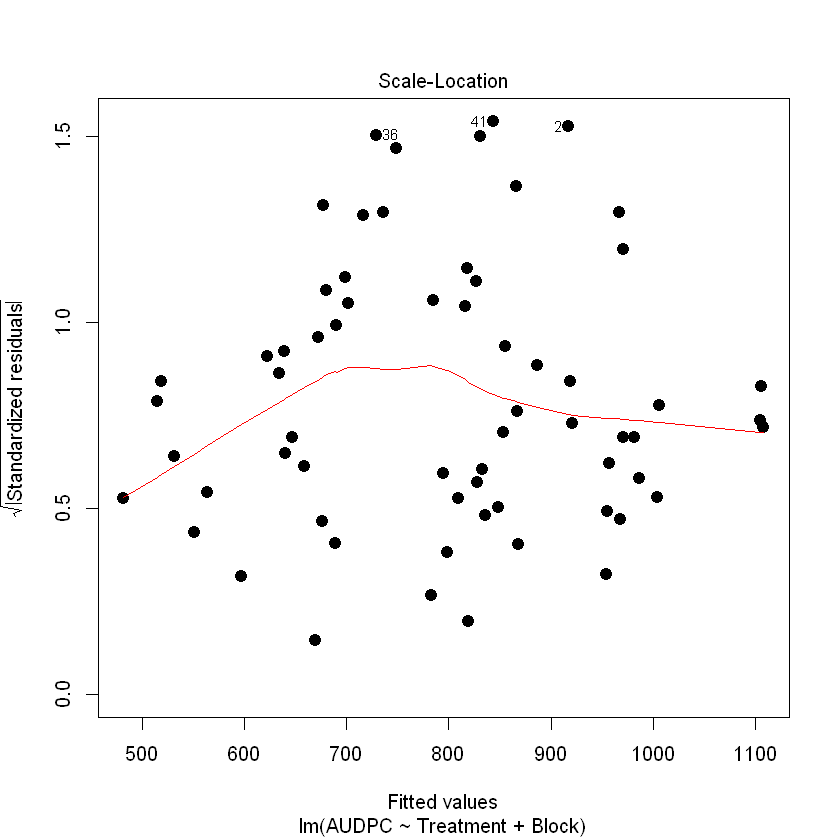

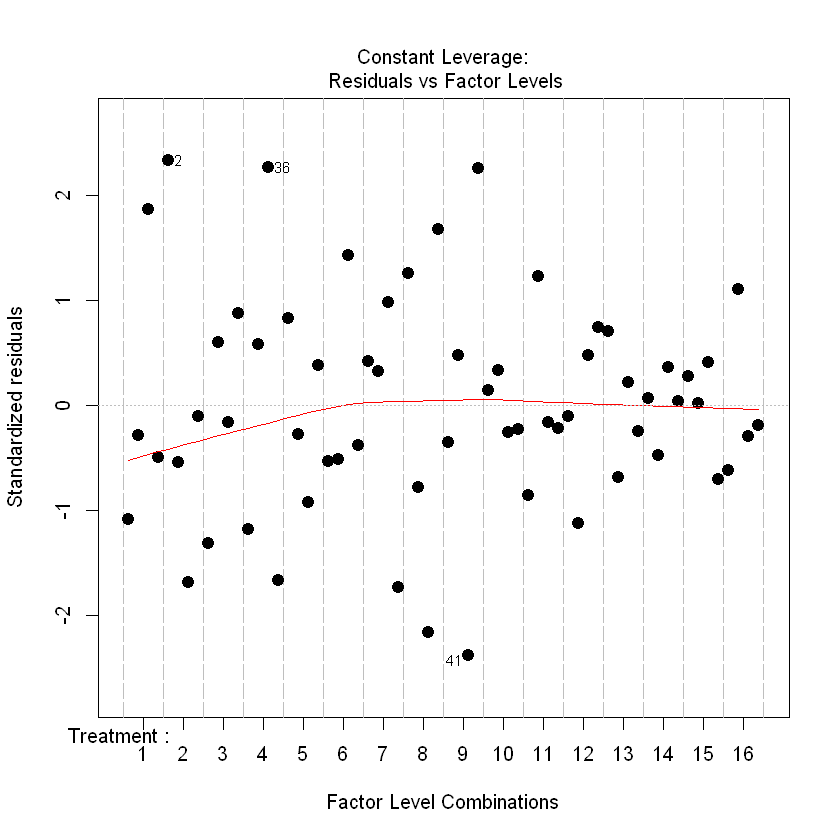

In [38]:
plot(m, pch=20, cex=2)

## Post-hoc comparisions

In [39]:
TukeyHSD(m2, )

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = AUDPC ~ Treatment + Block, data = df)

$Treatment
          diff       lwr         upr     p adj
2-1    100.750 -335.8999 537.3999344 0.9999605
3-1      2.000 -434.6499 438.6499344 1.0000000
4-1   -136.875 -573.5249 299.7749344 0.9985087
5-1   -194.500 -631.1499 242.1499344 0.9570254
6-1    104.250 -332.3999 540.8999344 0.9999394
7-1   -176.250 -612.8999 260.3999344 0.9813540
8-1   -117.625 -554.2749 319.0249344 0.9997361
9-1    -22.250 -458.8999 414.3999344 1.0000000
10-1   -17.625 -454.2749 419.0249344 1.0000000
11-1  -177.375 -614.0249 259.2749344 0.9802666
12-1  -219.375 -656.0249 217.2749344 0.8954993
13-1   102.000 -334.6499 538.6499344 0.9999539
14-1   -33.750 -470.3999 402.8999344 1.0000000
15-1  -334.750 -771.3999 101.8999344 0.3167540
16-1  -302.375 -739.0249 134.2749344 0.4821937
3-2    -98.750 -535.3999 337.8999344 0.9999694
4-2   -237.625 -674.2749 199.0249344 0.8268563
5-2   -29